## Housing Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Business Goal

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# head
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Finding the rows having null values
house.isnull().any(axis=1).sum()

1460

In [7]:
#Selecting rows with null values
house[house.isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [8]:
#Finding the columns having null values
house.columns[house.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
#No of duplicate records
len(house[house.duplicated()].index)

0

In [10]:
#Percentage of null values in each column
print (round((house.isnull().sum() * 100/ len(house)),2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [11]:
#Total no of null values
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
#Select columns with more than 40% null values
cols = house.columns[round((house.isnull().sum() * 100/ len(house)),2) > 40].tolist()
cols

#Create a new dataframe removing the selected columns
house = house[house.columns[~house.columns.isin(cols)]]
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [13]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [14]:
#Percentage of null values in each column
print (round((house.isnull().sum() * 100/ len(house)),2).sort_values(ascending=False))

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

In [15]:
#Finding the columns having null values
cols = house.columns[house.isna().any()].tolist()
cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [16]:
#Selecting rows with null values
house[house.isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
7        8          60       RL          NaN    10382   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
14      15          20       RL          NaN    10920   Pave      IR1   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
31      32          20       RL          NaN     8544   Pave      IR1   
39      40          90       RL         65.0     6040   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
48      49         190       RM         33.0     4456   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
64      65          60       RL          NaN     9375   Pave      Reg   
66      67          20       RL          NaN    19900   Pave      Reg   
76      77          20       RL          NaN     8475   Pave      IR1   
78      79          90       RL         72.0    10778   Pave      Reg   
84      85          80       RL          NaN     8530   Pave      IR1   
88      89          50  C (all)        105.0     8470   Pave      IR1   
89      90          20       RL         60.0     8070   Pave      Reg   
90      91          20       RL         60.0     7200   Pave      Reg   
95      96          60       RL          NaN     9765   Pave      IR2   
99     100          20       RL         77.0     9320   Pave      IR1   
100    101          20       RL          NaN    10603   Pave      IR1   
102    103          90       RL         64.0     7018   Pave      Reg   
104    105          50       RM          NaN     7758   Pave      Reg   
108    109          50       RM         85.0     8500   Pave      Reg   
111    112          80       RL          NaN     7750   Pave      IR1   
113    114          20       RL          NaN    21000   Pave      Reg   
116    117          20       RL          NaN    11616   Pave      Reg   
120    121          80       RL          NaN    21453   Pave      IR1   
125    126         190       RM         60.0     6780   Pave      Reg   
126    127         120       RL          NaN     4928   Pave      IR1   
127    128          45       RM         55.0     4388   Pave      IR1   
131    132          60       RL          NaN    12224   Pave      IR1   
133    134          20       RL          NaN     6853   Pave      IR1   
136    137          20       RL          NaN    10355   Pave      IR1   
140    141          20       RL         70.0    10500   Pave      Reg   
147    148          60       RL          NaN     9505   Pave      IR1   
148    149          20       RL         63.0     7500   Pave      Reg   
149    150          50       RM          NaN     6240   Pave      Reg   
152    153          60       RL          NaN    14803   Pave      IR1   
153    154          20       RL          NaN    13500   Pave      Reg   
155    156          50       RL         60.0     9600   Pave      Reg   
156    157          20       RL         60.0     7200   Pave      Reg   
160    161          20       RL          NaN    11120   Pave      IR1   
163    164          45       RL         55.0     5500   Pave      Reg   
165    166         190       RL         62.0    10106   Pave      Reg   
166    167          20       RL          NaN    10708   Pave      IR1   
169    170          20       RL          NaN    16669   Pave      IR1   
170    171          50       RM          NaN    12358   Pave      IR1   
177    178          50       RL          NaN    13650   Pave      Reg   
180    181         160       FV          NaN     2117   Pave      Reg   
182    183          20       RL         60.0     9060   Pave      Reg   
186    187          80       RL          NaN     9947   Pave      

In [17]:
#Impute categorical values with previous row value
cat_vars_new = house.select_dtypes(include=['object']).columns
cat_vars_new

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
for i in cat_vars_new:
    house[i].fillna('NA', inplace = True)

house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [19]:
#Impute numerical values with mean for null values
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace = True)

house['GarageArea'].fillna(house['GarageArea'].median(), inplace = True)

house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace = True)

house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace = True)

In [20]:
#Finding the rows having null values
house.isnull().any(axis=1).sum()

0

In [21]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112799    30.202904     20.645407   180.731373   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.589041     1.767123   472.980137    94.244521    46.660274   
std      23.997022     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Data Analysis and Visualization

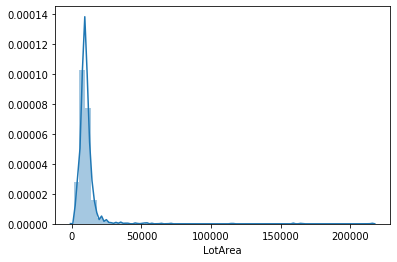

In [22]:
# LotArea
sns.distplot(house['LotArea'])
plt.show()

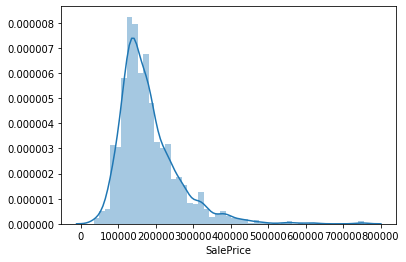

In [23]:
# SalePrice
sns.distplot(house['SalePrice'])
plt.show()

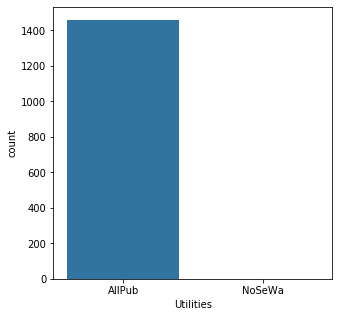

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot('Utilities', data=house)
plt.show()

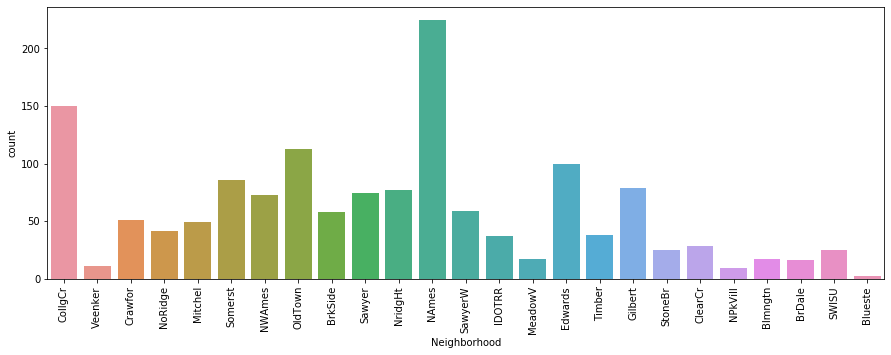

In [25]:
plt.figure(figsize=(15, 5))
c1 = sns.countplot('Neighborhood', data=house)
c1.set_xticklabels(c1.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

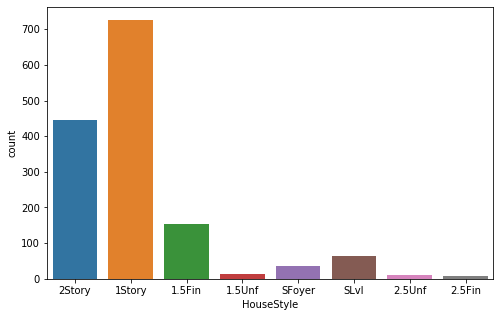

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot('HouseStyle', data=house)
plt.show()

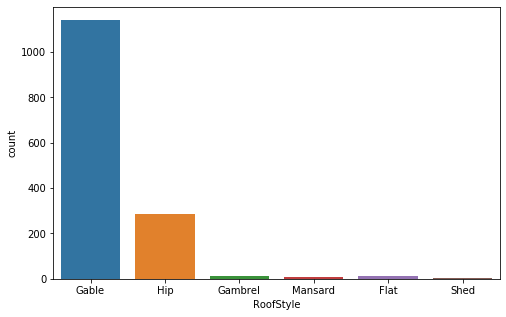

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot('RoofStyle', data=house)
plt.show()

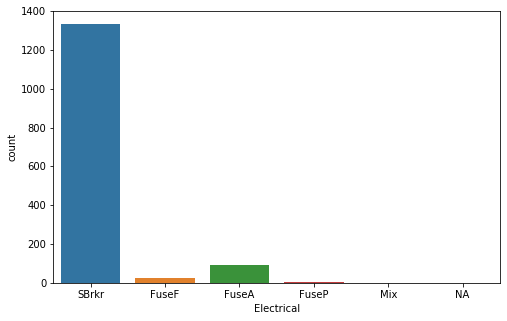

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot('Electrical', data=house)
plt.show()

In [29]:
# correlation matrix
cor = house.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009921 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.356718 -0.139781     0.032628   
LotFrontage   -0.009921   -0.356718     1.000000  0.304522     0.234812   
LotArea       -0.033226   -0.139781     0.304522  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.042463  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.037469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006979  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.004905 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.233221  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062996 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323511  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.075542  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010287 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal       -0.006242   -0.007683    -0.000255  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006380 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334771  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

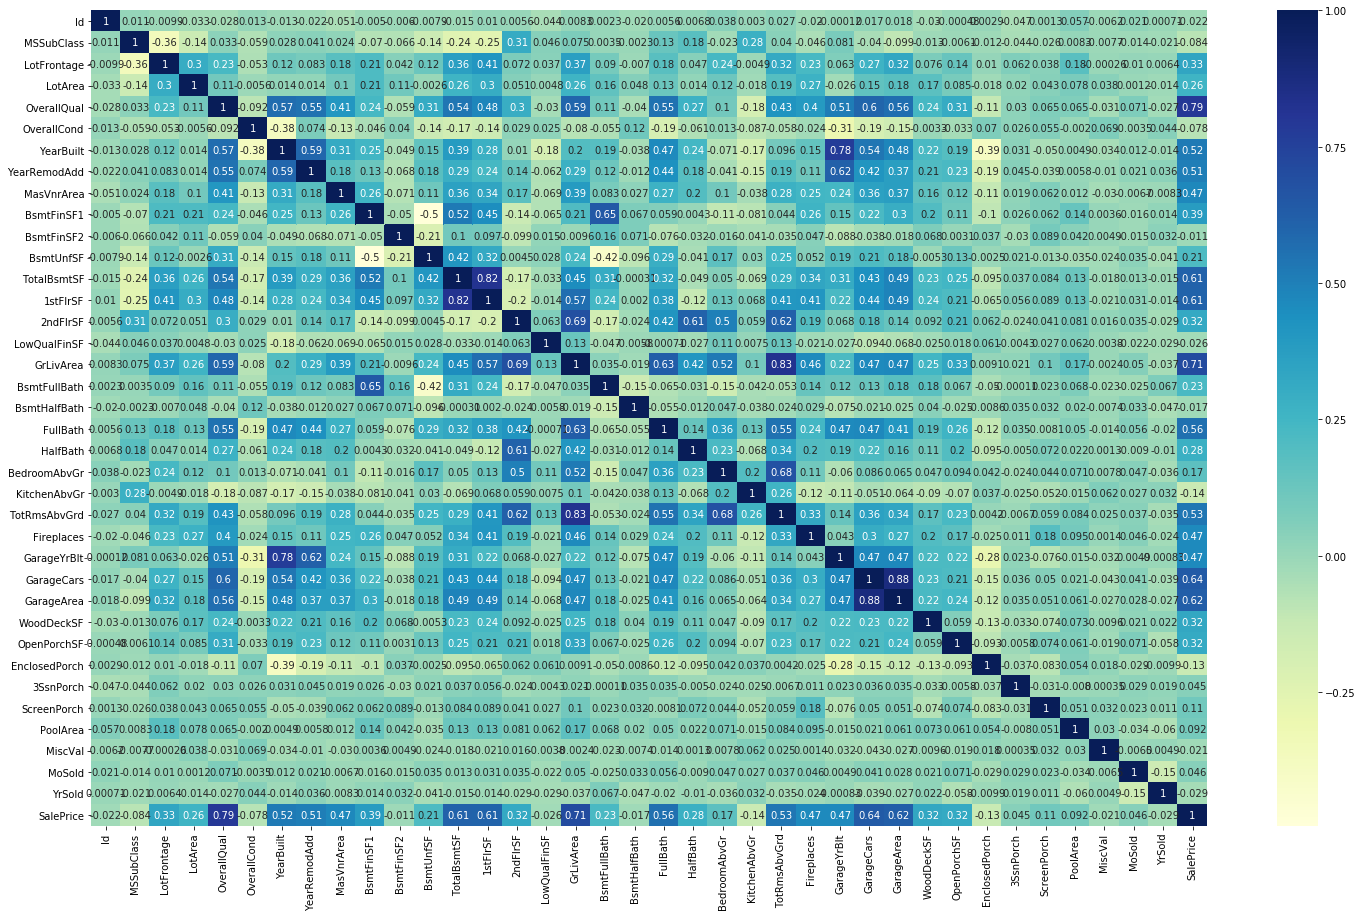

In [30]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [31]:
cols = house.columns.tolist()
cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [32]:
X = house.loc[:,['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour',
                 'Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                 'HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl',
                 'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation',
                 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
                 'BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF',
                 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt',
                 'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
                 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold', 'YrSold',
                 'SaleType', 'SaleCondition']]
y= house['SalePrice']
X.isnull().any(axis=1).sum()

0

In [33]:
#Get the list of categorical variables
cat_vars = X.select_dtypes(include=['object']).columns
cat_vars

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
# convert into dummies
# Creating a dummy variable for the variable 'MSZoning'
cont = pd.get_dummies(house['MSZoning'],prefix='MSZoning',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Street'
cont = pd.get_dummies(house['Street'],prefix='Street',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Lead Origin'
cont = pd.get_dummies(house['LotShape'],prefix='LotShape',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'LandContour'
cont = pd.get_dummies(house['LandContour'],prefix='LandContour',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Utilities'
cont = pd.get_dummies(house['Utilities'],prefix='Utilities',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'LandSlope'
cont = pd.get_dummies(house['LandSlope'],prefix='LandSlope',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Neighborhood'
cont = pd.get_dummies(house['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Condition1'
cont = pd.get_dummies(house['Condition1'],prefix='Condition1',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Condition2'
cont = pd.get_dummies(house['Condition2'],prefix='Condition2',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BldgType'
cont = pd.get_dummies(house['BldgType'],prefix='BldgType',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'HouseStyle'
cont = pd.get_dummies(house['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'RoofStyle'
cont = pd.get_dummies(house['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'RoofMatl'
cont = pd.get_dummies(house['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior1st'
cont = pd.get_dummies(house['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd'
cont = pd.get_dummies(house['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'MasVnrType'
cont = pd.get_dummies(house['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'ExterQual'
cont = pd.get_dummies(house['ExterQual'],prefix='ExterQual',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'ExterCond'
cont = pd.get_dummies(house['ExterCond'],prefix='ExterCond',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Foundation'
cont = pd.get_dummies(house['Foundation'],prefix='Foundation',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtQual'
cont = pd.get_dummies(house['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtCond'
cont = pd.get_dummies(house['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtExposure'
cont = pd.get_dummies(house['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType1'
cont = pd.get_dummies(house['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType2'
cont = pd.get_dummies(house['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Heating'
cont = pd.get_dummies(house['Heating'],prefix='Heating',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'HeatingQC'
cont = pd.get_dummies(house['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'CentralAir'
cont = pd.get_dummies(house['CentralAir'],prefix='CentralAir',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Electrical'
cont = pd.get_dummies(house['Electrical'],prefix='Electrical',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'KitchenQual'
cont = pd.get_dummies(house['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'Functional'
cont = pd.get_dummies(house['Functional'],prefix='Functional',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'GarageType'
cont = pd.get_dummies(house['GarageType'],prefix='GarageType',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'GarageFinish'
cont = pd.get_dummies(house['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'GarageQual'
cont = pd.get_dummies(house['GarageQual'],prefix='GarageQual',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'GarageCond'
cont = pd.get_dummies(house['GarageCond'],prefix='GarageCond',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'PavedDrive'
cont = pd.get_dummies(house['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'SaleType'
cont = pd.get_dummies(house['SaleType'],prefix='SaleType',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

# Creating a dummy variable for the variable 'SaleCondition'
cont = pd.get_dummies(house['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Concatenate to 'house' dataframe
house = pd.concat([house,cont],axis=1)

In [35]:
#created dummies for the below variables, so drop the same
house = house.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],axis = 1)
house.shape

(1460, 241)

In [36]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols
# scaling the numerics
cols = house.columns
X = pd.DataFrame(scale(house))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=241)

In [37]:
X = house.drop(["Id", "SalePrice"], axis=1)
y = np.log(house["SalePrice"])

In [38]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting house prices, using ridge and lasso regression.

## Ridge Regression

In [39]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)  

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005977      0.001064         0.000803        0.001605      0.0001   
1       0.013071      0.001902         0.002114        0.001620       0.001   
2       0.012062      0.002901         0.001004        0.001558        0.01   
3       0.007598      0.001940         0.000800        0.001601        0.05   
4       0.008039      0.003434         0.002768        0.001904         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.090573          -0.094887          -0.094983   
1   {'alpha': 0.001}          -0.090482          -0.094860          -0.095023   
2    {'alpha': 0.01}          -0.090628          -0.094616          -0.095916   
3    {'alpha': 0.05}          -0.094579          -0.093950          -0.099729   
4     {'alpha': 0.1}          -0.096522          -0.093620          -0.101839   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.099806          -0.083535        -0.092755        0.005457   
1          -0.099267          -0.083356        -0.092596        0.005389   
2          -0.095130          -0.083632        -0.091983        0.004556   
3          -0.088354          -0.087112        -0.092747        0.004572   
4          -0.086335          -0.089325        -0.093531        0.005429   

   rank_test_score  split0_train_score  split1_train_score  \
0               13           -0.055861           -0.056559   
1               11           -0.055930           -0.056565   
2                6           -0.057058           -0.056627   
3               12           -0.061011           -0.056971   
4               16           -0.063554           -0.057348   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.056874           -0.057603           -0.056880   
1           -0.056939           -0.057638           -0.056945   
2           -0.057782           -0.058397           -0.057871   
3           -0.061201           -0.062251           -0.062263   
4           -0.063402           -0.065085           -0.065145   

   mean_train_score  std_train_score  
0         -0.056756         0.000563  
1         -0.056804         0.000558  
2         -0.057547         0.000627  
3         -0.060739         0.001954  
4         -0.062907         0.002874

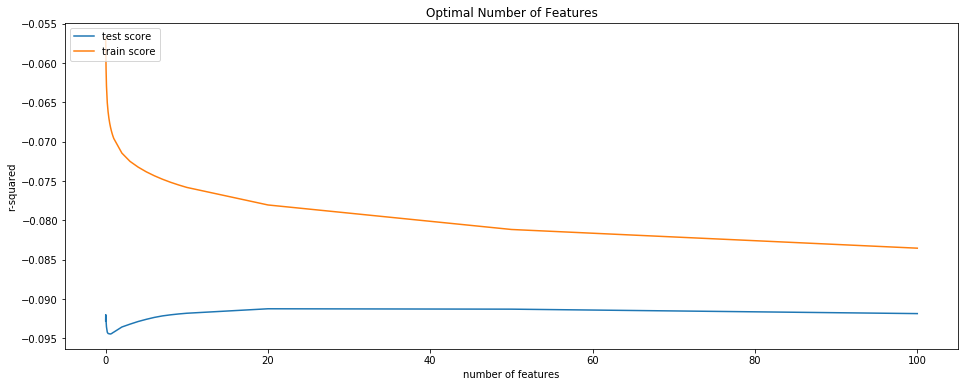

In [41]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

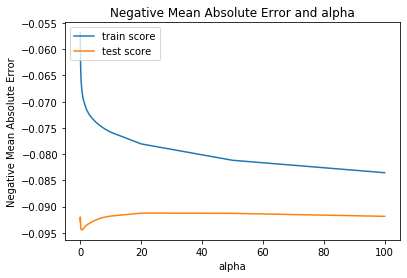

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.30796224e-04, -5.07958377e-04,  1.74732209e-06,  6.18536091e-02,
        3.82747109e-02,  1.62029394e-03,  1.20622419e-03, -5.90869294e-06,
       -1.16291643e-05,  3.33690899e-05,  8.55231278e-07,  2.25951579e-05,
        6.41237600e-05,  7.30022268e-05,  2.16329012e-05,  1.58758888e-04,
        5.29043947e-02,  6.99533350e-03,  2.37400882e-02,  1.65101766e-02,
        1.23348414e-02, -2.20576473e-02,  9.09438446e-03,  3.11879485e-02,
       -3.84431283e-04,  4.98011940e-02,  5.60947316e-05,  1.08466234e-04,
       -4.14677404e-05,  1.59076000e-04,  2.66196786e-04,  2.36749218e-04,
       -5.27329300e-04, -2.84673641e-06, -7.80348085e-04, -6.24075699e-03,
        3.62259236e-02,  1.92134804e-02,  4.89574168e-02, -8.74174539e-03,
        1.81228139e-02,  1.85680596e-02, -3.09559337e-02, -2.45877831e-03,
        2.50665096e-02,  2.79173601e-02,  3.29352126e-02, -5.53980333e-03,
        2.34559658e-02, -2.70447695e-03, -1.37067893e-03, -1.69225950e-02,
        1.83158434e-02,  

In [44]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9124497064542341


In [45]:
r = pd.Series(ridge.coef_, index=X.columns)
r.shape

(239,)

In [46]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8864279081631239


`r2_score for test set is slighlty less than the train set, but we have 239 columns`

## Lasso

In [47]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.139929      0.053250         0.002583        0.001274      0.0001   
1       0.029523      0.004417         0.002319        0.000726       0.001   
2       0.015841      0.002917         0.001174        0.001071        0.01   
3       0.078609      0.021352         0.002666        0.001774        0.05   
4       0.065990      0.011582         0.000479        0.000590         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089264          -0.092992          -0.097078   
1   {'alpha': 0.001}          -0.091380          -0.095718          -0.101722   
2    {'alpha': 0.01}          -0.097999          -0.106586          -0.107573   
3    {'alpha': 0.05}          -0.104540          -0.119443          -0.118573   
4     {'alpha': 0.1}          -0.111820          -0.126433          -0.125647   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.084696          -0.079104        -0.088627        0.006274   
1          -0.080212          -0.086499        -0.091106        0.007398   
2          -0.090408          -0.094376        -0.099387        0.006727   
3          -0.103658          -0.102814        -0.109800        0.007537   
4          -0.112498          -0.112166        -0.117707        0.006806   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.064815           -0.059665   
1                2           -0.082379           -0.072066   
2                3           -0.098482           -0.088074   
3                4           -0.107713           -0.100156   
4                8           -0.116979           -0.105711   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.064016           -0.064267           -0.065820   
1           -0.077652           -0.083955           -0.082787   
2           -0.093648           -0.099792           -0.097713   
3           -0.104424           -0.108917           -0.108240   
4           -0.111714           -0.117123           -0.117483   

   mean_train_score  std_train_score  
0         -0.063716         0.002118  
1         -0.079768         0.004411  
2         -0.095542         0.004261  
3         -0.105890         0.003257  
4         -0.113802         0.004571

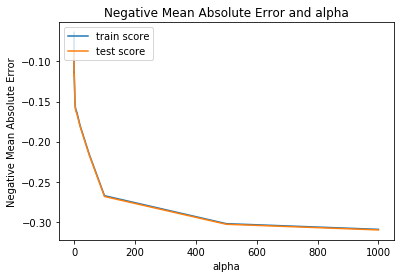

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
alpha = 1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [51]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  1.30801292e-06,  0.00000000e+00,
        0.00000000e+00,  2.64613086e-03,  1.17161380e-03,  3.66013641e-05,
        3.42308931e-05,  0.00000000e+00, -0.00000000e+00,  1.51437320e-04,
        0.00000000e+00,  1.63617961e-05, -0.00000000e+00,  2.91457086e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.95610551e-04,  2.16807989e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.67545848e-05,
       -2.53563955e-04, -1.39479815e-06,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [52]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.7633443098562884


In [53]:
l = pd.Series(lasso.coef_, index=X.columns)
l = l[(l > 0)]
l

LotArea         0.000001
YearBuilt       0.002646
YearRemodAdd    0.001172
MasVnrArea      0.000037
BsmtFinSF1      0.000034
TotalBsmtSF     0.000151
2ndFlrSF        0.000016
GrLivArea       0.000291
GarageArea      0.000396
WoodDeckSF      0.000217
ScreenPorch     0.000067
dtype: float64

In [54]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.777635577579733


r2_score seems to be almost similar for train and test sets

In [55]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.03658786797671439


`The variables that predict the house price include the following`

`LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, Fireplaces, GarageArea, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch`

Comparing Lasso, and Ridge, Lasso regularization seems to be the best model in this case, with the optimal value of 0.01 for alpha